In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats
from matplotlib import style
from datetime import timedelta

Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

[-0.15971094 -0.05647717  0.72385687 -0.05382204 -0.0278436  -0.02586989
 -0.02015357 -0.00302183 -0.21806477 -0.0255837  -0.02828581 -0.03727341
 -0.03437516 -0.03526961  0.07305077 -0.0584604  -0.01269572]
[-0.09620082 -0.0482455   0.29700883 -0.03813978 -0.01770202 -0.02256301
 -0.00975418  0.00049714 -0.10316092 -0.02644087 -0.01719177  0.02400026
 -0.03303158 -0.0332771   0.16488314 -0.02904267 -0.01163915]
[ 0.23379036 -0.06332588 -0.01066968  0.02017303  0.04544788  0.02180604
 -0.02085762 -0.00667515  0.03543367 -0.02386615 -0.02381665 -0.02805702
 -0.03255255 -0.03226266 -0.04168824 -0.06109032 -0.01178905]
[ 0.13947657 -0.0619966  -0.03219036  0.10616385  0.04244845  0.03390207
 -0.02202448 -0.0020964   0.03650757 -0.02420595 -0.02257606 -0.02349323
 -0.03030751 -0.02752148 -0.04003412 -0.0590964  -0.01295591]
[ 0.20994078 -0.0389263  -0.02558082  0.01193666  0.00402645 -0.01423888
 -0.01365804 -0.00505386  0.07479752 -0.01413015 -0.02456678 -0.0147822
 -0.02805681 -0.0194237

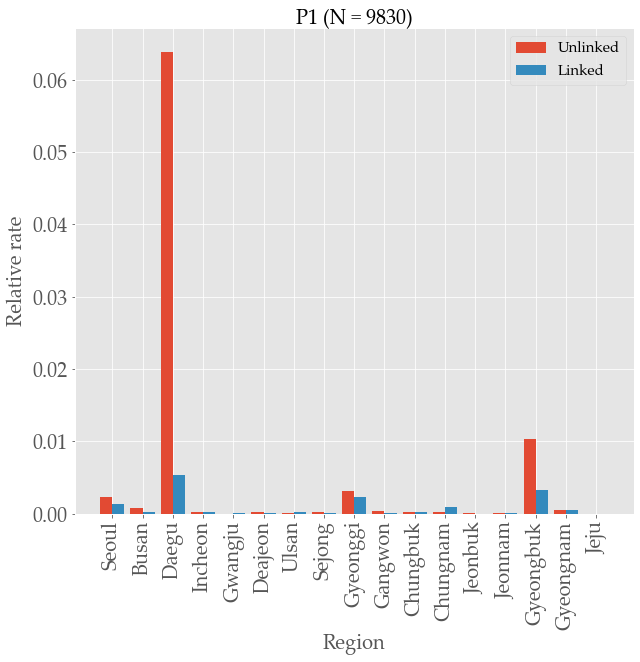

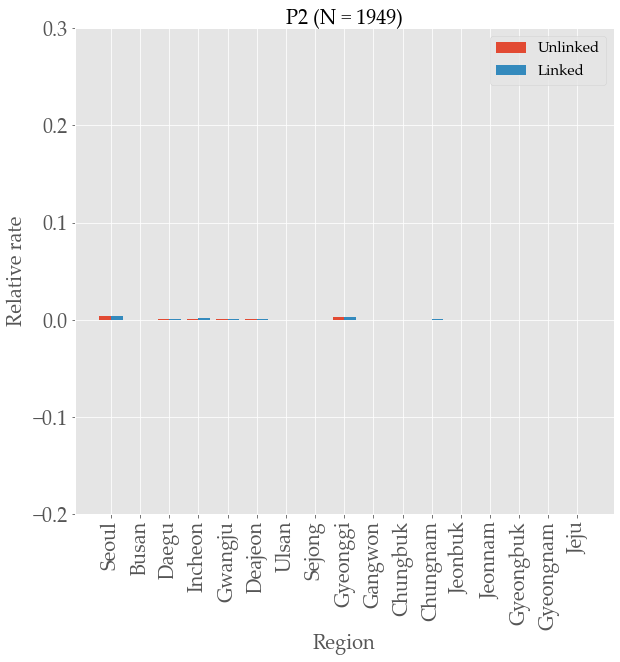

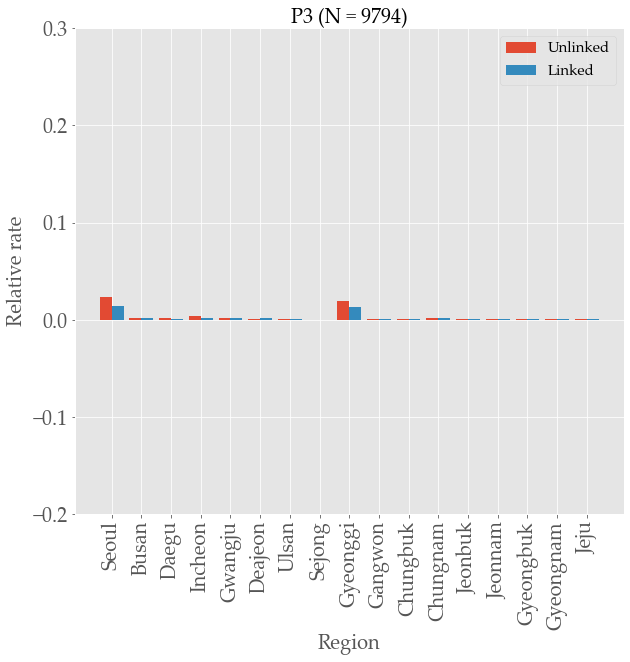

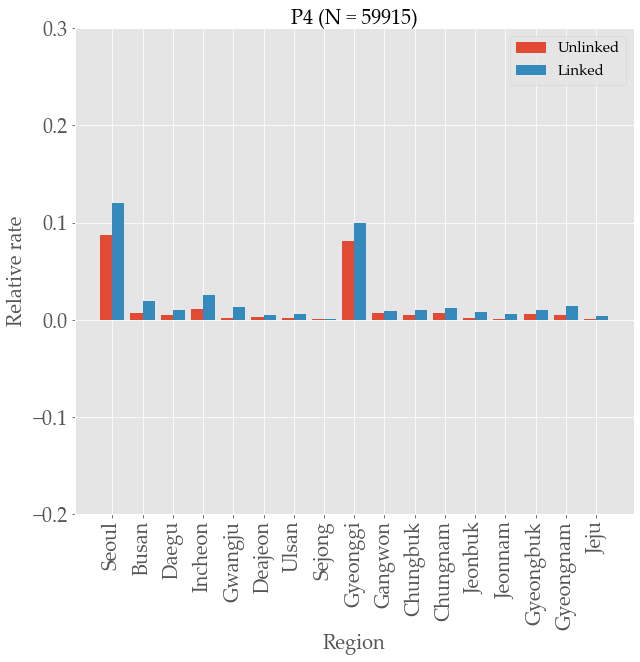

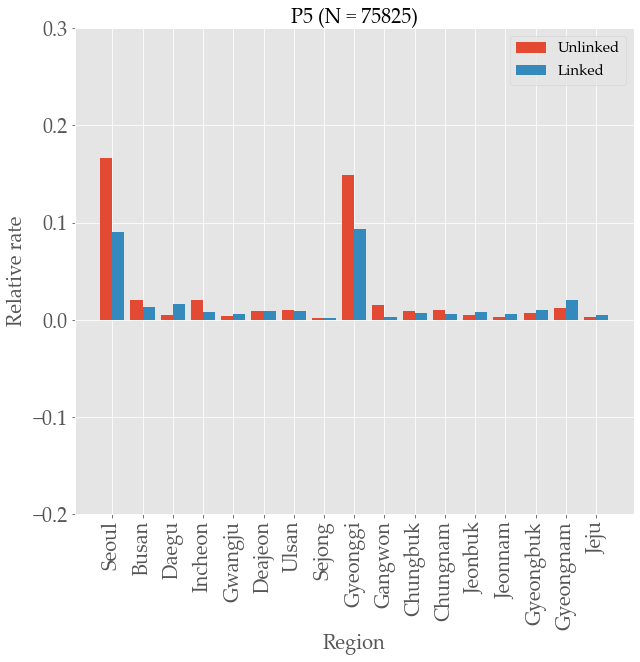

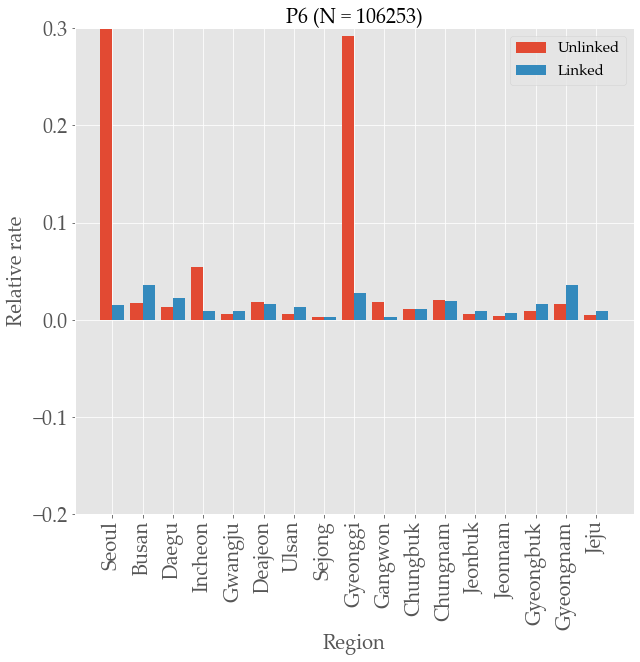

In [2]:

style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"

target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-01-19', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
# frac = [0.2,0.3,0.2,0.05,0.05,0.05]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    ## Chi Sqare
    Net_df_2 = Net_df_1.copy()
    Net_df_2 = Net_df_2[['region_type', 'Primary_id']].dropna(axis=0)


    Primary_OX = []
    Region_OX = []
    for k in Net_df_2.index:
        if Net_df_2.loc[k,'Primary_id'] != 0:
            Primary_OX.append(1)
        elif Net_df_2.loc[k,'Primary_id'] == 0:
            Primary_OX.append(0)

            
        if Net_df_2.loc[k,'region_type'] == '01서울':
            Region_OX.append('01서울')
        elif Net_df_2.loc[k,'region_type'] == '02부산':
            Region_OX.append('02부산')
        elif Net_df_2.loc[k,'region_type'] == '03대구':
            Region_OX.append('03대구')
        elif Net_df_2.loc[k,'region_type'] == '04인천':
            Region_OX.append('04인천')
        elif Net_df_2.loc[k,'region_type'] == '05광주':
            Region_OX.append('05광주')
        elif Net_df_2.loc[k,'region_type'] == '06대전':
            Region_OX.append('06대전')
        elif Net_df_2.loc[k,'region_type'] == '07울산':
            Region_OX.append('07울산')
        elif Net_df_2.loc[k,'region_type'] == '08세종':
            Region_OX.append('08세종')
        elif Net_df_2.loc[k,'region_type'] == '09경기':
            Region_OX.append('09경기')
        elif Net_df_2.loc[k,'region_type'] == '10강원':
            Region_OX.append('10강원')
        elif Net_df_2.loc[k,'region_type'] == '11충북':
            Region_OX.append('11충북')
        elif Net_df_2.loc[k,'region_type'] == '12충남':
            Region_OX.append('12충남')
        elif Net_df_2.loc[k,'region_type'] == '13전북':
            Region_OX.append('13전북')
        elif Net_df_2.loc[k,'region_type'] == '14전남':
            Region_OX.append('14전남')
        elif Net_df_2.loc[k,'region_type'] == '15경북':
            Region_OX.append('15경북')
        elif Net_df_2.loc[k,'region_type'] == '16경남':
            Region_OX.append('16경남')
        elif Net_df_2.loc[k,'region_type'] == '17제주':
            Region_OX.append('17제주')
        # else:
        #     Region_OX.append('미분류')
            
    Net_df_2['Primary_OX'] = Primary_OX
    Net_df_2['Region_OX'] = Region_OX    

    df12345 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'])
    df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')


    ## Real Age Distribution
    
    Region_dist = pd.read_csv('Data/region_distribution_Montly.csv',encoding='cp949')

    Region_dist_ratio_df = pd.DataFrame({'서울특별시' : [],
                                    '부산광역시' : [],
                                    '대구광역시' : [],
                                    '인천광역시' : [],
                                    '광주광역시' : [],
                                    '대전광역시' : [],
                                    '울산광역시' : [],
                                    '세종특별자치시' : [],
                                    '경기도' : [],
                                    '강원도' : [],
                                    '충청북도' : [],
                                    '충청남도' : [],
                                    '전라북도' : [],
                                    '전라남도' : [],
                                    '경상북도' : [],
                                    '경상남도' : [],
                                    '제주특별자치도' : []})

    for i2 in range(len(Region_dist)):
        Region_dist_ratio = np.array(Region_dist.loc[i2][2:]) / Region_dist.loc[i2][1]
        

        Region_dist_ratio_df.loc[i2] = [Region_dist_ratio[0],
                                        Region_dist_ratio[1],
                                        Region_dist_ratio[2],
                                        Region_dist_ratio[3],
                                        Region_dist_ratio[4],
                                        Region_dist_ratio[5],
                                        Region_dist_ratio[6],
                                        Region_dist_ratio[7],
                                        Region_dist_ratio[8],
                                        Region_dist_ratio[9],
                                        Region_dist_ratio[10],
                                        Region_dist_ratio[11],
                                        Region_dist_ratio[12],
                                        Region_dist_ratio[13],
                                        Region_dist_ratio[14],
                                        Region_dist_ratio[15],
                                        Region_dist_ratio[16]]
                                    
    Period_Region_Dist = [np.sum(Region_dist_ratio_df.loc[:4])/5,
                    np.sum(Region_dist_ratio_df.loc[4:7])/4,
                    np.sum(Region_dist_ratio_df.loc[7:10])/4,
                    np.sum(Region_dist_ratio_df.loc[10:14])/5,
                    np.sum(Region_dist_ratio_df.loc[14:19])/6,
                    np.sum(Region_dist_ratio_df.loc[19:])/2]

    fig = plt.figure(figsize=(9,9))
    ax = fig.subplots()
    print(np.array(df1234[0])-np.array(Period_Region_Dist[i]))
    print(np.array(df1234[1])-np.array(Period_Region_Dist[i]))
    # print(np.array(df1234[1]))
    # plt.plot(np.array(df1234[0])-np.array(Period_Region_Dist[i]), 'o', linewidth=10, color= '#F8766D')
    # plt.plot(np.array(df1234[1])-np.array(Period_Region_Dist[i]), 'o', linewidth=5, color= '#619CFF')
    

    # plt.bar([0.9,1.9,2.9,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9,13.9,14.9,15.9,16.9],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.2)
    # plt.bar([1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.2)
    

    # plt.bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
    # plt.bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
    plt.bar([i+0.8 for i in range(17)],np.array(df12345[0])/100000,width=0.4)
    plt.bar([i+1.2 for i in range(17)],np.array(df12345[1])/100000,width=0.4)
    # plt.plot(Period_Age_Dist[i], linewidth=5)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
    plt.yticks(fontsize=20)
    ax.set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                        , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], rotation=90, fontsize=20)
    plt.legend(['Unlinked','Linked','Age_Dist'], fontsize=15)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[0])-np.array(Period_Region_Dist[i]), lw=10, color= '#F8766D', alpha = 0.7)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[1])-np.array(Period_Region_Dist[i]), lw=5, color= '#619CFF', alpha = 0.7)
    # plt.ylim([0, 0.5])
    plt.ylabel('Relative rate',fontsize=20)
    plt.xlabel('Region',fontsize=20)
    
    
    plt.tight_layout()
    
    if i != 0:
        plt.ylim([-0.20, 0.30])
    plt.title('P' + str(i+1) + ' (N = ' + str(len(Net_df_2)) + ')', fontsize=20)
    plt.savefig(str(i+1) + ' Relative distribution of confirmed cases by region with respect to population distribution', bbox_inches='tight')
    # save_cross.to_csv('cross_table.csv',float_format = '%.2f')
    # plt.show()




In [10]:
df12345 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'])
df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')

[ 0.08828418 -0.0043861  -0.03425968  0.00156951 -0.02454809  0.00114597
 -0.01580888  0.00168749  0.10125024  0.02770182  0.00101186 -0.02047053
 -0.01090535 -0.02868514 -0.03535177 -0.03929168 -0.00894385]
[ 0.12120757 -0.01477932 -0.01576967 -0.0166779  -0.0157988  -0.02120723
 -0.00523434 -0.00339405  0.09858427 -0.02248938 -0.00378989 -0.02825555
 -0.00628157 -0.03139717 -0.02795449  0.0020499  -0.00881239]
[ 0.2058515  -0.02470299 -0.03710444 -0.01456571 -0.01864149 -0.01052566
  0.00492668 -0.00289454  0.07060537 -0.00283521 -0.01377643 -0.01909671
 -0.02666631 -0.03072243 -0.03653079 -0.03626497 -0.00705587]
[ 9.55461979e-02 -3.02790923e-02  1.61133573e-02 -3.90725292e-02
 -6.49715136e-03  1.11195558e-02  1.21749609e-02  4.17378655e-07
  1.18849933e-02 -1.88141467e-02 -9.50735415e-03 -1.71685573e-02
 -1.29082463e-02 -9.47177745e-03 -1.14318795e-02 -3.00051562e-04
  8.61130321e-03]


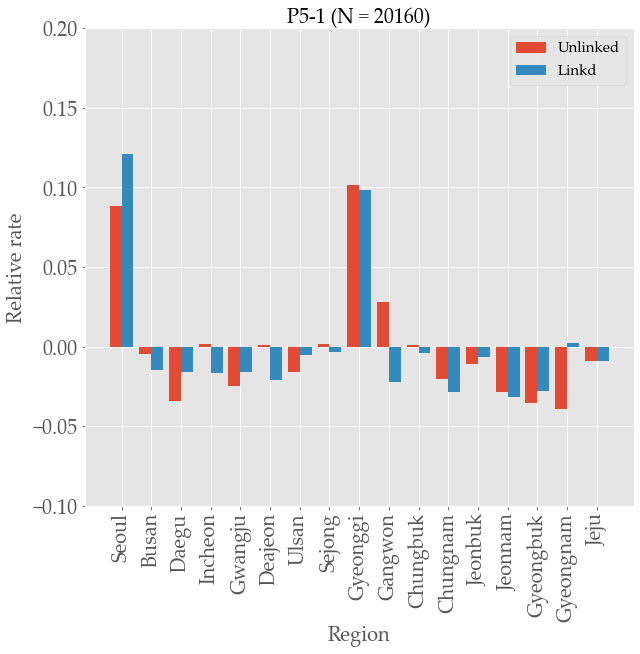

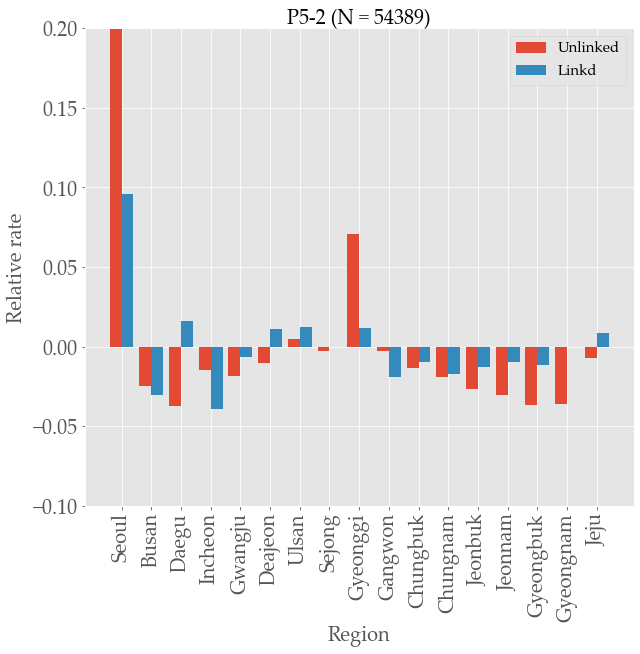

In [5]:
## 5-1,2 구간 Unknown, Known
style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"

target_date = ['2021-02-26', '2021-04-12','2021-07-11']
# target_date = ['2020-01-19', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
# frac = [0.2,0.3,0.2,0.05,0.05,0.05]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    ## Chi Sqare
    Net_df_2 = Net_df_1.copy()
    Net_df_2 = Net_df_2[['region_type', 'Primary_id']].dropna(axis=0)


    Primary_OX = []
    Region_OX = []
    for k in Net_df_2.index:
        if Net_df_2.loc[k,'Primary_id'] != 0:
            Primary_OX.append(1)
        elif Net_df_2.loc[k,'Primary_id'] == 0:
            Primary_OX.append(0)

            
        if Net_df_2.loc[k,'region_type'] == '01서울':
            Region_OX.append('01서울')
        elif Net_df_2.loc[k,'region_type'] == '02부산':
            Region_OX.append('02부산')
        elif Net_df_2.loc[k,'region_type'] == '03대구':
            Region_OX.append('03대구')
        elif Net_df_2.loc[k,'region_type'] == '04인천':
            Region_OX.append('04인천')
        elif Net_df_2.loc[k,'region_type'] == '05광주':
            Region_OX.append('05광주')
        elif Net_df_2.loc[k,'region_type'] == '06대전':
            Region_OX.append('06대전')
        elif Net_df_2.loc[k,'region_type'] == '07울산':
            Region_OX.append('07울산')
        elif Net_df_2.loc[k,'region_type'] == '08세종':
            Region_OX.append('08세종')
        elif Net_df_2.loc[k,'region_type'] == '09경기':
            Region_OX.append('09경기')
        elif Net_df_2.loc[k,'region_type'] == '10강원':
            Region_OX.append('10강원')
        elif Net_df_2.loc[k,'region_type'] == '11충북':
            Region_OX.append('11충북')
        elif Net_df_2.loc[k,'region_type'] == '12충남':
            Region_OX.append('12충남')
        elif Net_df_2.loc[k,'region_type'] == '13전북':
            Region_OX.append('13전북')
        elif Net_df_2.loc[k,'region_type'] == '14전남':
            Region_OX.append('14전남')
        elif Net_df_2.loc[k,'region_type'] == '15경북':
            Region_OX.append('15경북')
        elif Net_df_2.loc[k,'region_type'] == '16경남':
            Region_OX.append('16경남')
        elif Net_df_2.loc[k,'region_type'] == '17제주':
            Region_OX.append('17제주')
        # else:
        #     Region_OX.append('미분류')
            
    Net_df_2['Primary_OX'] = Primary_OX
    Net_df_2['Region_OX'] = Region_OX    


    df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')


    ## Real Age Distribution
    
    Region_dist = pd.read_csv('Data/region_distribution_Montly.csv',encoding='cp949')

    Region_dist_ratio_df = pd.DataFrame({'서울특별시' : [],
                                    '부산광역시' : [],
                                    '대구광역시' : [],
                                    '인천광역시' : [],
                                    '광주광역시' : [],
                                    '대전광역시' : [],
                                    '울산광역시' : [],
                                    '세종특별자치시' : [],
                                    '경기도' : [],
                                    '강원도' : [],
                                    '충청북도' : [],
                                    '충청남도' : [],
                                    '전라북도' : [],
                                    '전라남도' : [],
                                    '경상북도' : [],
                                    '경상남도' : [],
                                    '제주특별자치도' : []})

    for i2 in range(len(Region_dist)):
        Region_dist_ratio = np.array(Region_dist.loc[i2][2:]) / Region_dist.loc[i2][1]
        

        Region_dist_ratio_df.loc[i2] = [Region_dist_ratio[0],
                                        Region_dist_ratio[1],
                                        Region_dist_ratio[2],
                                        Region_dist_ratio[3],
                                        Region_dist_ratio[4],
                                        Region_dist_ratio[5],
                                        Region_dist_ratio[6],
                                        Region_dist_ratio[7],
                                        Region_dist_ratio[8],
                                        Region_dist_ratio[9],
                                        Region_dist_ratio[10],
                                        Region_dist_ratio[11],
                                        Region_dist_ratio[12],
                                        Region_dist_ratio[13],
                                        Region_dist_ratio[14],
                                        Region_dist_ratio[15],
                                        Region_dist_ratio[16]]
                                    
    Period_Region_Dist = [np.sum(Region_dist_ratio_df.loc[:4])/5,
                    np.sum(Region_dist_ratio_df.loc[4:7])/4,
                    np.sum(Region_dist_ratio_df.loc[7:10])/4,
                    np.sum(Region_dist_ratio_df.loc[10:14])/5,
                    np.sum(Region_dist_ratio_df.loc[14:19])/6,
                    np.sum(Region_dist_ratio_df.loc[19:])/2]

    fig = plt.figure(figsize=(9,9))
    ax = fig.subplots()

    # plt.plot(np.array(df1234[0])-np.array(Period_Region_Dist[i]), 'o', linewidth=10, color= '#F8766D')
    # plt.plot(np.array(df1234[1])-np.array(Period_Region_Dist[i]), 'o', linewidth=5, color= '#619CFF')
    
    print(np.array(df1234[0])-np.array(Period_Region_Dist[i]))
    print(np.array(df1234[1])-np.array(Period_Region_Dist[i]))
    plt.bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
    plt.bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
    # plt.plot(Period_Age_Dist[i], linewidth=5)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                        , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], rotation=90)
    plt.legend(['Unlinked','Linkd','Age_Dist'], fontsize=15)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[0])-np.array(Period_Region_Dist[i]), lw=10, color= '#F8766D', alpha = 0.7)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[1])-np.array(Period_Region_Dist[i]), lw=5, color= '#619CFF', alpha = 0.7)
    # plt.ylim([0, 0.5])
    plt.ylabel('Relative rate',fontsize=20)
    plt.xlabel('Region',fontsize=20)
    plt.ylim([-0.1, 0.2])
    plt.tight_layout()
    plt.title('P5-' + str(i+1) + ' (N = ' + str(len(Net_df_2)) + ')', fontsize=20)
    plt.savefig(str(i+1) + ' 5 period', bbox_inches='tight')
    # save_cross.to_csv('cross_table.csv',float_format = '%.2f')
    # plt.show()

SUBPLOTS

[-0.15971094 -0.05647717  0.72385687 -0.05382204 -0.0278436  -0.02586989
 -0.02015357 -0.00302183 -0.21806477 -0.0255837  -0.02828581 -0.03727341
 -0.03437516 -0.03526961  0.07305077 -0.0584604  -0.01269572]
[-0.09620082 -0.0482455   0.29700883 -0.03813978 -0.01770202 -0.02256301
 -0.00975418  0.00049714 -0.10316092 -0.02644087 -0.01719177  0.02400026
 -0.03303158 -0.0332771   0.16488314 -0.02904267 -0.01163915]
[ 0.23379036 -0.06332588 -0.01066968  0.02017303  0.04544788  0.02180604
 -0.02085762 -0.00667515  0.03543367 -0.02386615 -0.02381665 -0.02805702
 -0.03255255 -0.03226266 -0.04168824 -0.06109032 -0.01178905]
[ 0.13947657 -0.0619966  -0.03219036  0.10616385  0.04244845  0.03390207
 -0.02202448 -0.0020964   0.03650757 -0.02420595 -0.02257606 -0.02349323
 -0.03030751 -0.02752148 -0.04003412 -0.0590964  -0.01295591]
[ 0.20994078 -0.0389263  -0.02558082  0.01193666  0.00402645 -0.01423888
 -0.01365804 -0.00505386  0.07479752 -0.01413015 -0.02456678 -0.0147822
 -0.02805681 -0.0194237

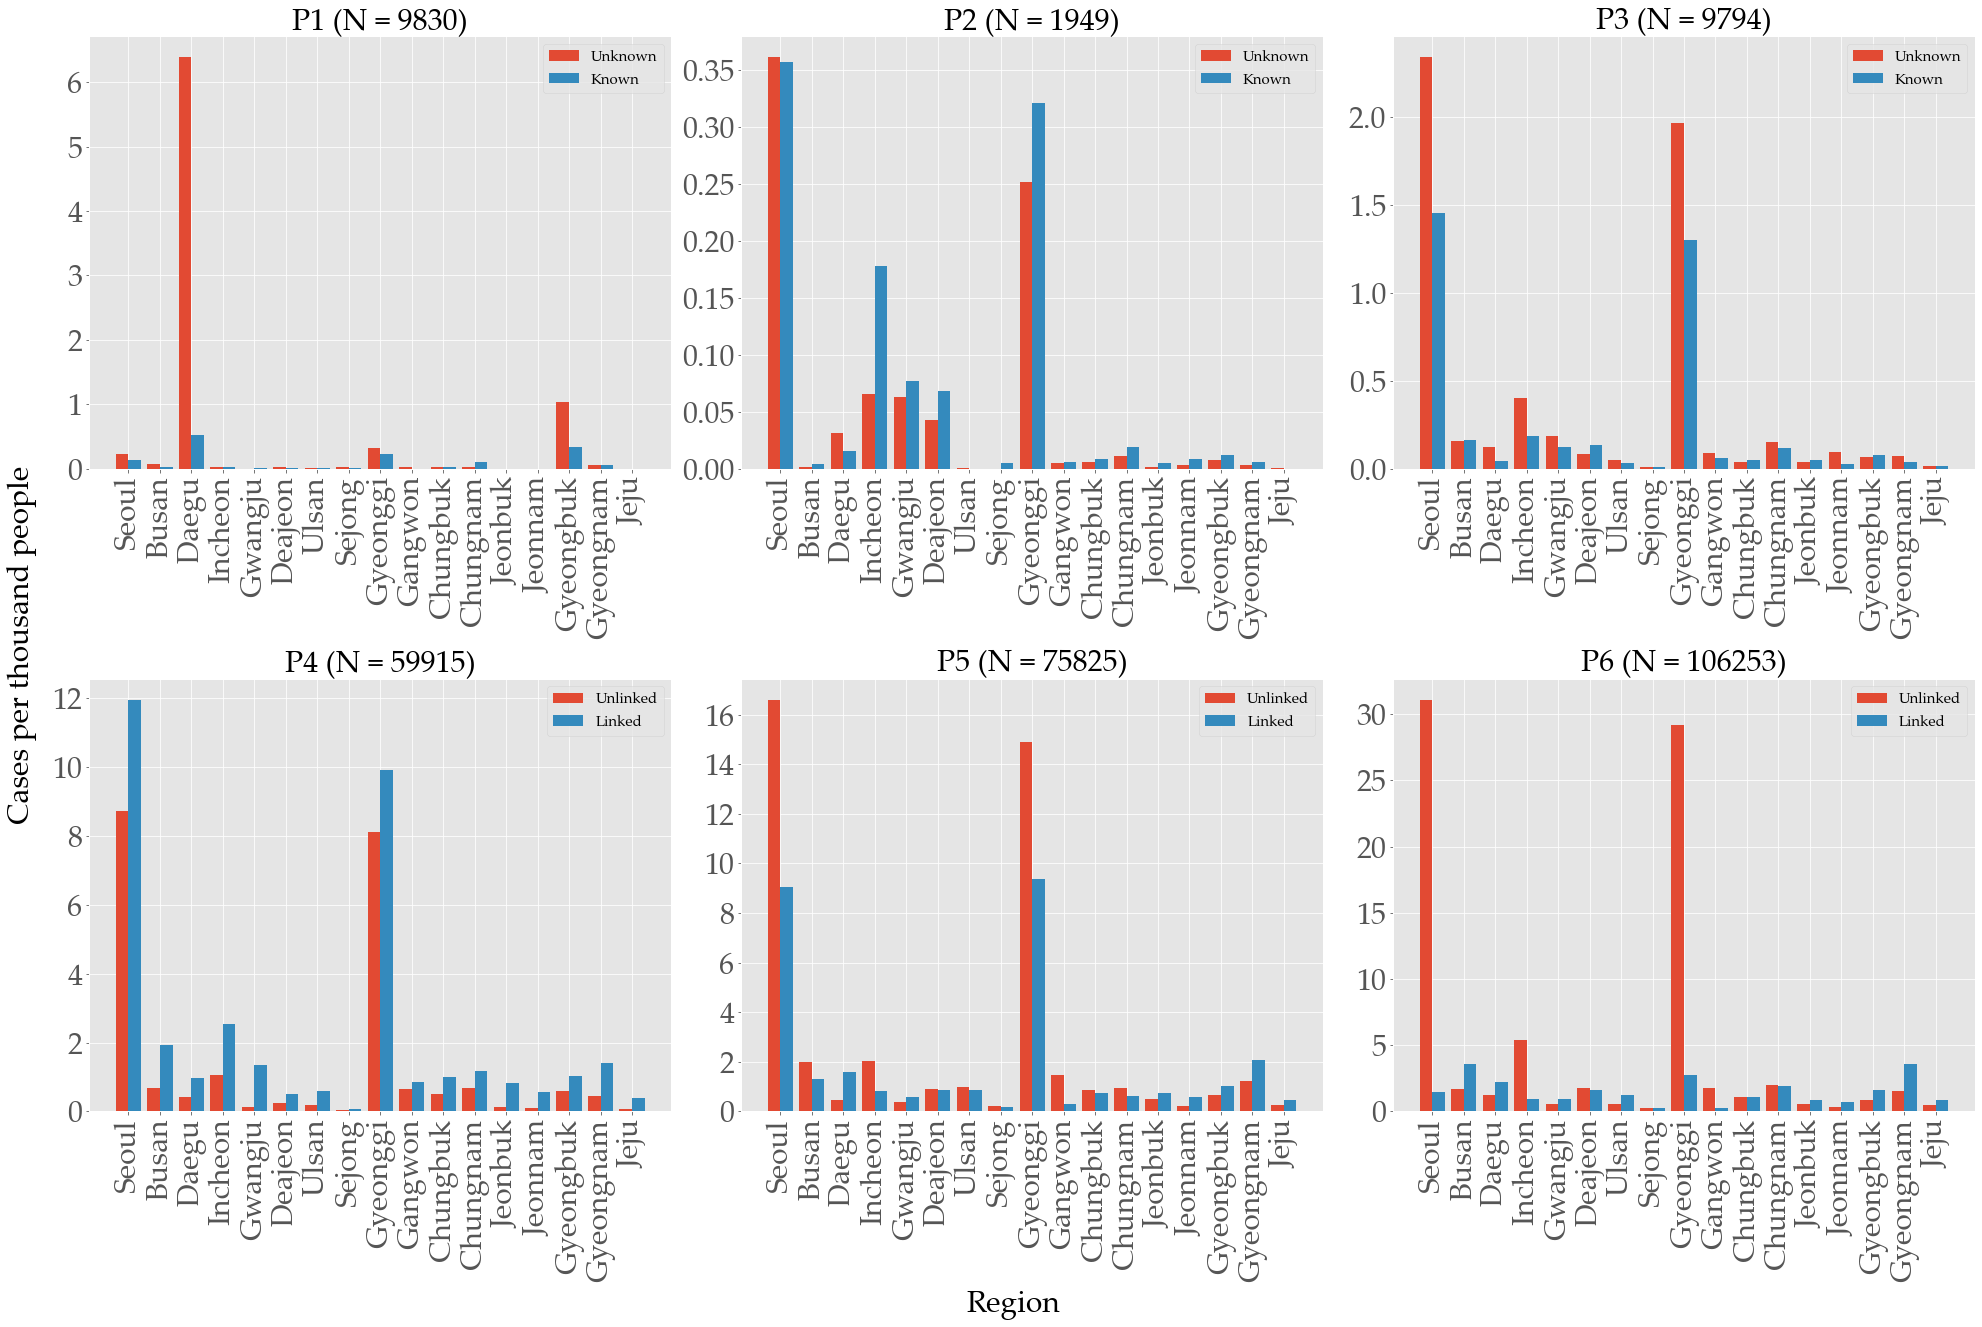

In [6]:

style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"
fig, ax = plt.subplots(2,3, figsize=(27,18))

target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-01-19', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
# frac = [0.2,0.3,0.2,0.05,0.05,0.05]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    ## Chi Sqare
    Net_df_2 = Net_df_1.copy()
    Net_df_2 = Net_df_2[['region_type', 'Primary_id']].dropna(axis=0)


    Primary_OX = []
    Region_OX = []
    for k in Net_df_2.index:
        if Net_df_2.loc[k,'Primary_id'] != 0:
            Primary_OX.append(1)
        elif Net_df_2.loc[k,'Primary_id'] == 0:
            Primary_OX.append(0)

            
        if Net_df_2.loc[k,'region_type'] == '01서울':
            Region_OX.append('01서울')
        elif Net_df_2.loc[k,'region_type'] == '02부산':
            Region_OX.append('02부산')
        elif Net_df_2.loc[k,'region_type'] == '03대구':
            Region_OX.append('03대구')
        elif Net_df_2.loc[k,'region_type'] == '04인천':
            Region_OX.append('04인천')
        elif Net_df_2.loc[k,'region_type'] == '05광주':
            Region_OX.append('05광주')
        elif Net_df_2.loc[k,'region_type'] == '06대전':
            Region_OX.append('06대전')
        elif Net_df_2.loc[k,'region_type'] == '07울산':
            Region_OX.append('07울산')
        elif Net_df_2.loc[k,'region_type'] == '08세종':
            Region_OX.append('08세종')
        elif Net_df_2.loc[k,'region_type'] == '09경기':
            Region_OX.append('09경기')
        elif Net_df_2.loc[k,'region_type'] == '10강원':
            Region_OX.append('10강원')
        elif Net_df_2.loc[k,'region_type'] == '11충북':
            Region_OX.append('11충북')
        elif Net_df_2.loc[k,'region_type'] == '12충남':
            Region_OX.append('12충남')
        elif Net_df_2.loc[k,'region_type'] == '13전북':
            Region_OX.append('13전북')
        elif Net_df_2.loc[k,'region_type'] == '14전남':
            Region_OX.append('14전남')
        elif Net_df_2.loc[k,'region_type'] == '15경북':
            Region_OX.append('15경북')
        elif Net_df_2.loc[k,'region_type'] == '16경남':
            Region_OX.append('16경남')
        elif Net_df_2.loc[k,'region_type'] == '17제주':
            Region_OX.append('17제주')
        # else:
        #     Region_OX.append('미분류')
            
    Net_df_2['Primary_OX'] = Primary_OX
    Net_df_2['Region_OX'] = Region_OX    

    df12345 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'])
    df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')


    ## Real Age Distribution
    
    Region_dist = pd.read_csv('Data/region_distribution_Montly.csv',encoding='cp949')

    Region_dist_ratio_df = pd.DataFrame({'서울특별시' : [],
                                    '부산광역시' : [],
                                    '대구광역시' : [],
                                    '인천광역시' : [],
                                    '광주광역시' : [],
                                    '대전광역시' : [],
                                    '울산광역시' : [],
                                    '세종특별자치시' : [],
                                    '경기도' : [],
                                    '강원도' : [],
                                    '충청북도' : [],
                                    '충청남도' : [],
                                    '전라북도' : [],
                                    '전라남도' : [],
                                    '경상북도' : [],
                                    '경상남도' : [],
                                    '제주특별자치도' : []})

    for i2 in range(len(Region_dist)):
        Region_dist_ratio = np.array(Region_dist.loc[i2][2:]) / Region_dist.loc[i2][1]
        

        Region_dist_ratio_df.loc[i2] = [Region_dist_ratio[0],
                                        Region_dist_ratio[1],
                                        Region_dist_ratio[2],
                                        Region_dist_ratio[3],
                                        Region_dist_ratio[4],
                                        Region_dist_ratio[5],
                                        Region_dist_ratio[6],
                                        Region_dist_ratio[7],
                                        Region_dist_ratio[8],
                                        Region_dist_ratio[9],
                                        Region_dist_ratio[10],
                                        Region_dist_ratio[11],
                                        Region_dist_ratio[12],
                                        Region_dist_ratio[13],
                                        Region_dist_ratio[14],
                                        Region_dist_ratio[15],
                                        Region_dist_ratio[16]]
                                    
    Period_Region_Dist = [np.sum(Region_dist_ratio_df.loc[:4])/5,
                    np.sum(Region_dist_ratio_df.loc[4:7])/4,
                    np.sum(Region_dist_ratio_df.loc[7:10])/4,
                    np.sum(Region_dist_ratio_df.loc[10:14])/5,
                    np.sum(Region_dist_ratio_df.loc[14:19])/6,
                    np.sum(Region_dist_ratio_df.loc[19:])/2]

    # fig = plt.figure(figsize=(9,9))
    # ax = fig.subplots()
    print(np.array(df1234[0])-np.array(Period_Region_Dist[i]))
    print(np.array(df1234[1])-np.array(Period_Region_Dist[i]))
    # print(np.array(df1234[1]))
    # plt.plot(np.array(df1234[0])-np.array(Period_Region_Dist[i]), 'o', linewidth=10, color= '#F8766D')
    # plt.plot(np.array(df1234[1])-np.array(Period_Region_Dist[i]), 'o', linewidth=5, color= '#619CFF')
    

    # plt.bar([0.9,1.9,2.9,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9,13.9,14.9,15.9,16.9],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.2)
    # plt.bar([1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.2)
    
    if i < 3:
        # ax[0,i].bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
        # ax[0,i].bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
        ax[0,i].bar([i+0.8 for i in range(17)],np.array(df12345[0])/1000,width=0.4)
        ax[0,i].bar([i+1.2 for i in range(17)],np.array(df12345[1])/1000,width=0.4)
        # plt.plot(Period_Age_Dist[i], linewidth=5)
        ax[0,i].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
        for tick in ax[0,i].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(30) 
        ax[0,i].set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                            , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], rotation=90, fontsize=30)
        ax[0,i].legend(['Unknown','Known','Age_Dist'], fontsize=15)
        
        
        # if i != 0:
        #     ax[0,i].set_ylim([-0.20, 0.30])
        ax[0,i].set_title('P' + str(i+1) + ' (N = ' + str(len(Net_df_2)) + ')', fontsize=30)
        
    elif i >= 3:
        # ax[1,i-3].bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
        # ax[1,i-3].bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
        ax[1,i-3].bar([i+0.8 for i in range(17)],np.array(df12345[0])/1000,width=0.4)
        ax[1,i-3].bar([i+1.2 for i in range(17)],np.array(df12345[1])/1000,width=0.4)
        # plt.plot(Period_Age_Dist[i], linewidth=5)
        ax[1,i-3].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

        for tick in ax[1,i-3].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(30) 
        ax[1,i-3].set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                            , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], rotation=90, fontsize=30)
        ax[1,i-3].legend(['Unlinked','Linked','Age_Dist'], fontsize=15)
        
        # if i != 0:
        #     ax[1,i-3].set_ylim([-0.20, 0.30])
        ax[1,i-3].set_title('P' + str(i+1) + ' (N = ' + str(len(Net_df_2)) + ')', fontsize=30)
    
fig.text(0.5, -0.01, 'Region', va='center', ha='center', fontsize=30)
# fig.text(-0.01, 0.5, 'Relative rate', va='center', ha='center', rotation='vertical', fontsize = 30)
fig.text(-0.01, 0.5, 'Cases per thousand people', va='center', ha='center', rotation='vertical', fontsize = 30)
fig.tight_layout()
fig.savefig('Total Relative distribution of confirmed cases by region with respect to population distribution_revise', bbox_inches='tight')
# save_cross.to_csv('cross_table.csv',float_format = '%.2f')
# plt.show()


[ 0.11871666 -0.03466351  0.09807893 -0.01172975 -0.01900862 -0.01416865
 -0.01548885 -0.0029627   0.04381801 -0.00162962 -0.01251439 -0.01819112
 -0.02662037 -0.03001786 -0.01573233 -0.04766952 -0.0102163 ]
[ 0.13000108 -0.0167899  -0.01359765  0.00487776  0.00263271 -0.01350059
 -0.00679801 -0.00399616  0.0319702  -0.01122577 -0.00570163 -0.01265583
 -0.01312583 -0.02365144 -0.02034678 -0.02374658 -0.00434557]
[ 0.20813246 -0.02510098 -0.03722539 -0.01427416 -0.01878188 -0.01075178
  0.00431771 -0.00296773  0.07103455 -0.00302375 -0.01417624 -0.01928911
 -0.02685817 -0.03085718 -0.03680671 -0.03646468 -0.00690697]
[ 9.27313483e-02 -2.92288988e-02  1.59639475e-02 -3.88013063e-02
 -5.93309740e-03  1.15986690e-02  1.25366797e-02 -5.45169684e-06
  1.13100496e-02 -1.88369328e-02 -9.54552390e-03 -1.67401044e-02
 -1.31592206e-02 -9.64025780e-03 -1.17628596e-02  7.92354115e-04
  8.72060502e-03]


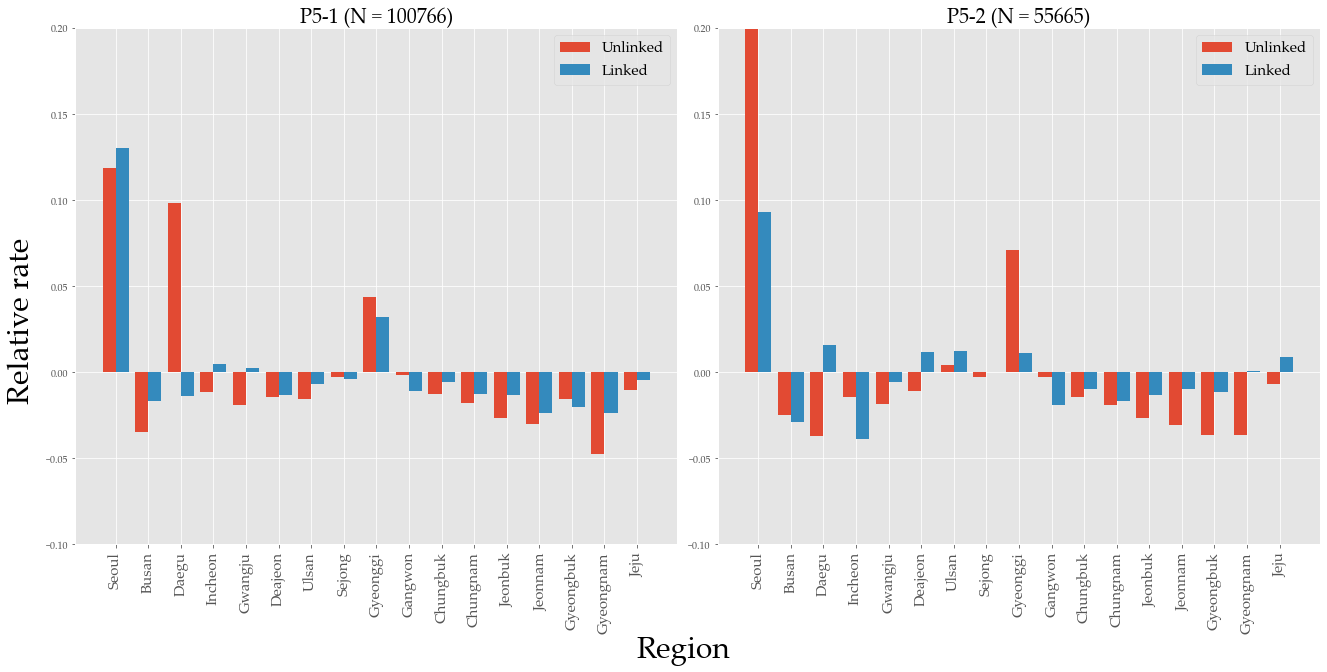

In [8]:
## 5-1,2 구간 Unknown, Known

plt.rcParams["font.family"] = "Palatino Linotype"
fig, ax = plt.subplots(1,2, figsize=(18,9))

target_date = ['2020-02-26', '2021-04-12','2021-07-12']
# target_date = ['2020-01-19', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
# frac = [0.2,0.3,0.2,0.05,0.05,0.05]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    ## Chi Sqare
    Net_df_2 = Net_df_1.copy()
    Net_df_2 = Net_df_2[['region_type', 'Primary_id']].dropna(axis=0)


    Primary_OX = []
    Region_OX = []
    for k in Net_df_2.index:
        if Net_df_2.loc[k,'Primary_id'] != 0:
            Primary_OX.append(1)
        elif Net_df_2.loc[k,'Primary_id'] == 0:
            Primary_OX.append(0)


        if Net_df_2.loc[k,'region_type'] == '01서울':
            Region_OX.append('01서울')
        elif Net_df_2.loc[k,'region_type'] == '02부산':
            Region_OX.append('02부산')
        elif Net_df_2.loc[k,'region_type'] == '03대구':
            Region_OX.append('03대구')
        elif Net_df_2.loc[k,'region_type'] == '04인천':
            Region_OX.append('04인천')
        elif Net_df_2.loc[k,'region_type'] == '05광주':
            Region_OX.append('05광주')
        elif Net_df_2.loc[k,'region_type'] == '06대전':
            Region_OX.append('06대전')
        elif Net_df_2.loc[k,'region_type'] == '07울산':
            Region_OX.append('07울산')
        elif Net_df_2.loc[k,'region_type'] == '08세종':
            Region_OX.append('08세종')
        elif Net_df_2.loc[k,'region_type'] == '09경기':
            Region_OX.append('09경기')
        elif Net_df_2.loc[k,'region_type'] == '10강원':
            Region_OX.append('10강원')
        elif Net_df_2.loc[k,'region_type'] == '11충북':
            Region_OX.append('11충북')
        elif Net_df_2.loc[k,'region_type'] == '12충남':
            Region_OX.append('12충남')
        elif Net_df_2.loc[k,'region_type'] == '13전북':
            Region_OX.append('13전북')
        elif Net_df_2.loc[k,'region_type'] == '14전남':
            Region_OX.append('14전남')
        elif Net_df_2.loc[k,'region_type'] == '15경북':
            Region_OX.append('15경북')
        elif Net_df_2.loc[k,'region_type'] == '16경남':
            Region_OX.append('16경남')
        elif Net_df_2.loc[k,'region_type'] == '17제주':
            Region_OX.append('17제주')
        # else:
        #     Region_OX.append('미분류')

    Net_df_2['Primary_OX'] = Primary_OX
    Net_df_2['Region_OX'] = Region_OX    


    df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')


    ## Real Age Distribution

    Region_dist = pd.read_csv('Data/region_distribution_Montly.csv',encoding='cp949')

    Region_dist_ratio_df = pd.DataFrame({'서울특별시' : [],
                                    '부산광역시' : [],
                                    '대구광역시' : [],
                                    '인천광역시' : [],
                                    '광주광역시' : [],
                                    '대전광역시' : [],
                                    '울산광역시' : [],
                                    '세종특별자치시' : [],
                                    '경기도' : [],
                                    '강원도' : [],
                                    '충청북도' : [],
                                    '충청남도' : [],
                                    '전라북도' : [],
                                    '전라남도' : [],
                                    '경상북도' : [],
                                    '경상남도' : [],
                                    '제주특별자치도' : []})

    for i2 in range(len(Region_dist)):
        Region_dist_ratio = np.array(Region_dist.loc[i2][2:]) / Region_dist.loc[i2][1]
        

        Region_dist_ratio_df.loc[i2] = [Region_dist_ratio[0],
                                        Region_dist_ratio[1],
                                        Region_dist_ratio[2],
                                        Region_dist_ratio[3],
                                        Region_dist_ratio[4],
                                        Region_dist_ratio[5],
                                        Region_dist_ratio[6],
                                        Region_dist_ratio[7],
                                        Region_dist_ratio[8],
                                        Region_dist_ratio[9],
                                        Region_dist_ratio[10],
                                        Region_dist_ratio[11],
                                        Region_dist_ratio[12],
                                        Region_dist_ratio[13],
                                        Region_dist_ratio[14],
                                        Region_dist_ratio[15],
                                        Region_dist_ratio[16]]
                                    
    Period_Region_Dist = [np.sum(Region_dist_ratio_df.loc[:4])/5,
                    np.sum(Region_dist_ratio_df.loc[4:7])/4,
                    np.sum(Region_dist_ratio_df.loc[7:10])/4,
                    np.sum(Region_dist_ratio_df.loc[10:14])/5,
                    np.sum(Region_dist_ratio_df.loc[14:19])/6,
                    np.sum(Region_dist_ratio_df.loc[19:])/2]

    # fig = plt.figure(figsize=(9,9))
    # ax = fig.subplots()

    # plt.plot(np.array(df1234[0])-np.array(Period_Region_Dist[i]), 'o', linewidth=10, color= '#F8766D')
    # plt.plot(np.array(df1234[1])-np.array(Period_Region_Dist[i]), 'o', linewidth=5, color= '#619CFF')
    
    print(np.array(df1234[0])-np.array(Period_Region_Dist[i]))
    print(np.array(df1234[1])-np.array(Period_Region_Dist[i]))
    ax[i].bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
    ax[i].bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
    # plt.plot(Period_Age_Dist[i], linewidth=5)
    ax[i].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
    # plt.yticks(fontsize=15)
    ax[i].set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                        , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], fontsize=15, rotation=90)
    ax[i].legend(['Unlinked','Linked','Age_Dist'], fontsize=15)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[0])-np.array(Period_Region_Dist[i]), lw=10, color= '#F8766D', alpha = 0.7)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[1])-np.array(Period_Region_Dist[i]), lw=5, color= '#619CFF', alpha = 0.7)
    # plt.ylim([0, 0.5])
    # plt.ylabel('Relative rate',fontsize=15)
    # plt.xlabel('Region',fontsize=15)
    ax[i].set_ylim([-0.1, 0.2])
    ax[i].set_title('P5-' + str(i+1) + ' (N = ' + str(len(Net_df_2)) + ')', fontsize=20)
    
fig.text(0.5, -0.01, 'Region', va='center', ha='center', fontsize=30)
fig.text(-0.01, 0.5, 'Relative rate', va='center', ha='center', rotation='vertical', fontsize = 30)
fig.tight_layout()
fig.savefig('5-1,2 period', bbox_inches='tight')
# save_cross.to_csv('cross_table.csv',float_format = '%.2f')
# plt.show()

[ 0.11220805 -0.03592821 -0.03863413  0.0049145  -0.02517711 -0.02100591
 -0.01981895 -0.00529246  0.17349908  0.03880257 -0.00629308 -0.03185893
 -0.02497119 -0.03346983 -0.03910426 -0.03668609 -0.01118405]
[ 0.09383322 -0.01888039 -0.01397322 -0.01645884 -0.01139718 -0.02173858
 -0.00803787 -0.00371938  0.10267574 -0.01951939  0.0068463  -0.02448345
 -0.00725938 -0.02971319 -0.03039286  0.0106453  -0.00842683]
[ 0.05093571  0.04376569 -0.02870457 -0.00903756 -0.01372002  0.01290015
  0.01667583  0.00317034 -0.00264871 -0.0010374   0.009992   -0.00458419
 -0.00166643 -0.02460528 -0.02366244 -0.02025926 -0.00751386]
[ 1.86790029e-01 -3.54128236e-02 -1.89674196e-02 -3.55632953e-02
 -2.07226582e-02 -2.11896916e-02  1.26472177e-02 -4.91096545e-03
  9.22721565e-02 -2.00829804e-02 -2.37626373e-02 -3.61209821e-02
 -1.48292177e-02 -3.22766692e-02 -1.62958695e-02 -1.69927966e-04
 -1.14042649e-02]
[ 0.13523145 -0.01263777 -0.03613727 -0.01392272 -0.01188431 -0.00344852
  0.0272237  -0.00095599 

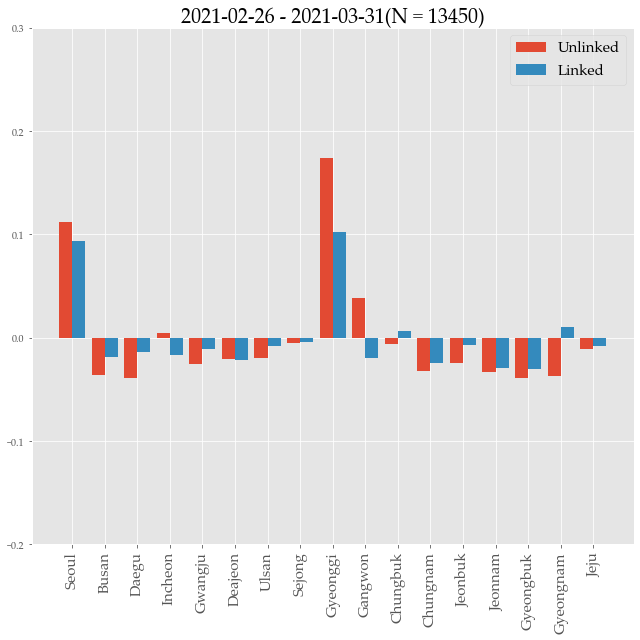

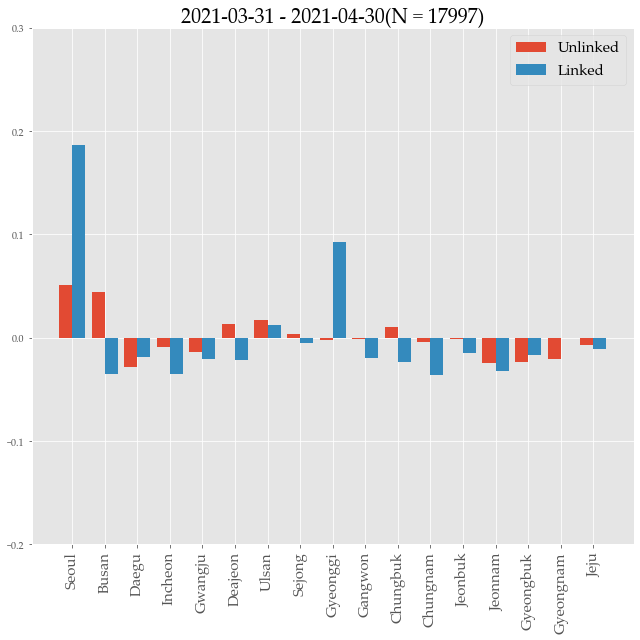

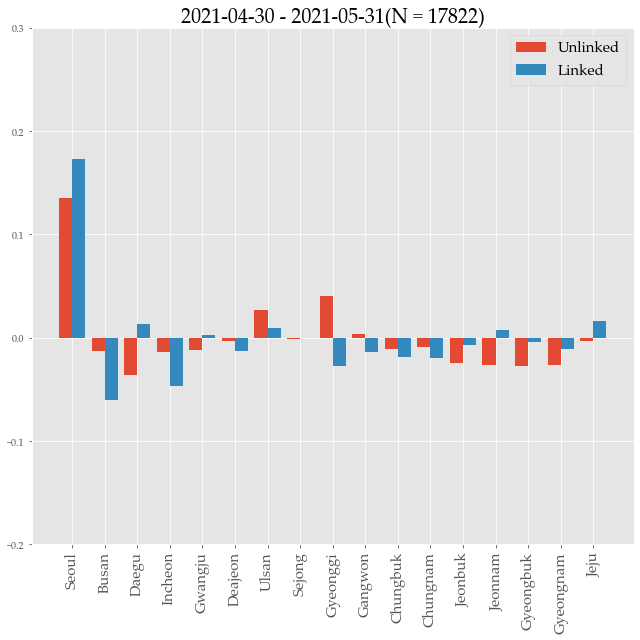

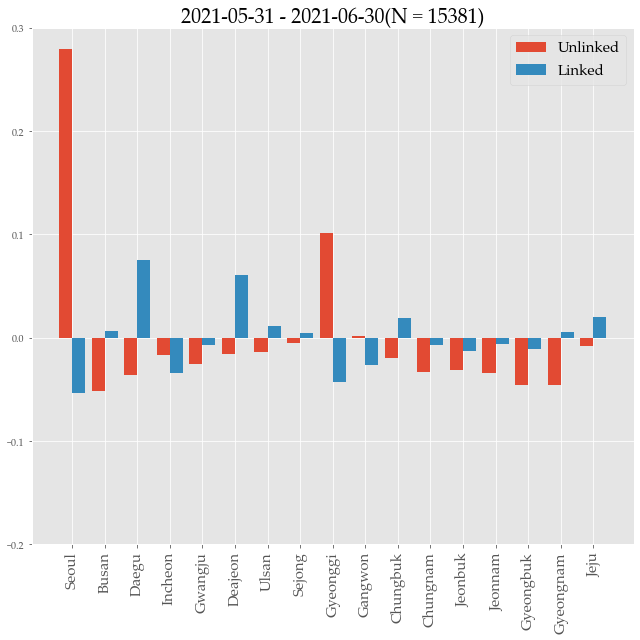

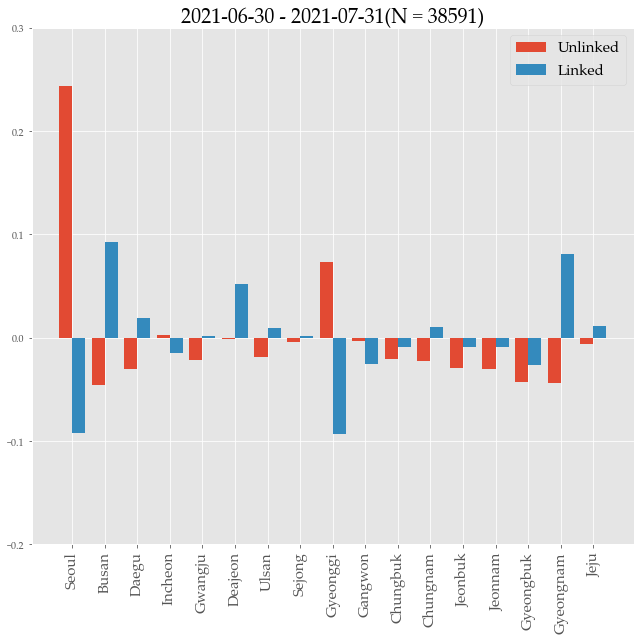

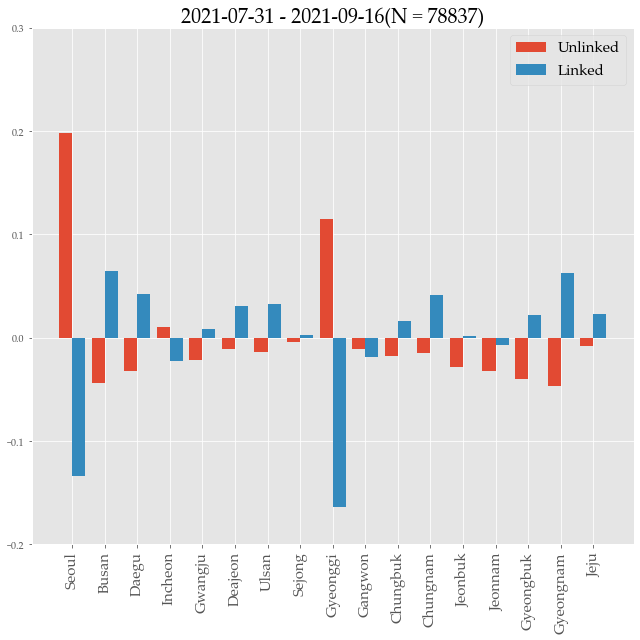

In [9]:
style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"
# fig, ax = plt.subplots(1,2, figsize=(18,9))

target_date = ['2021-02-26', '2021-03-31','2021-04-30','2021-05-31','2021-06-30','2021-07-31','2021-09-16']
# target_date = ['2020-01-19', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
# frac = [0.2,0.3,0.2,0.05,0.05,0.05]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    ## Chi Sqare
    Net_df_2 = Net_df_1.copy()
    Net_df_2 = Net_df_2[['region_type', 'Primary_id']].dropna(axis=0)


    Primary_OX = []
    Region_OX = []
    for k in Net_df_2.index:
        if Net_df_2.loc[k,'Primary_id'] != 0:
            Primary_OX.append(1)
        elif Net_df_2.loc[k,'Primary_id'] == 0:
            Primary_OX.append(0)

            
        if Net_df_2.loc[k,'region_type'] == '01서울':
            Region_OX.append('01서울')
        elif Net_df_2.loc[k,'region_type'] == '02부산':
            Region_OX.append('02부산')
        elif Net_df_2.loc[k,'region_type'] == '03대구':
            Region_OX.append('03대구')
        elif Net_df_2.loc[k,'region_type'] == '04인천':
            Region_OX.append('04인천')
        elif Net_df_2.loc[k,'region_type'] == '05광주':
            Region_OX.append('05광주')
        elif Net_df_2.loc[k,'region_type'] == '06대전':
            Region_OX.append('06대전')
        elif Net_df_2.loc[k,'region_type'] == '07울산':
            Region_OX.append('07울산')
        elif Net_df_2.loc[k,'region_type'] == '08세종':
            Region_OX.append('08세종')
        elif Net_df_2.loc[k,'region_type'] == '09경기':
            Region_OX.append('09경기')
        elif Net_df_2.loc[k,'region_type'] == '10강원':
            Region_OX.append('10강원')
        elif Net_df_2.loc[k,'region_type'] == '11충북':
            Region_OX.append('11충북')
        elif Net_df_2.loc[k,'region_type'] == '12충남':
            Region_OX.append('12충남')
        elif Net_df_2.loc[k,'region_type'] == '13전북':
            Region_OX.append('13전북')
        elif Net_df_2.loc[k,'region_type'] == '14전남':
            Region_OX.append('14전남')
        elif Net_df_2.loc[k,'region_type'] == '15경북':
            Region_OX.append('15경북')
        elif Net_df_2.loc[k,'region_type'] == '16경남':
            Region_OX.append('16경남')
        elif Net_df_2.loc[k,'region_type'] == '17제주':
            Region_OX.append('17제주')
        # else:
        #     Region_OX.append('미분류')
            
    Net_df_2['Primary_OX'] = Primary_OX
    Net_df_2['Region_OX'] = Region_OX    


    df1234 = pd.crosstab(Net_df_2['Region_OX'], Net_df_2['Primary_OX'], normalize='columns')


    ## Real Age Distribution
    
    Region_dist = pd.read_csv('Data/region_distribution_Montly.csv',encoding='cp949')

    Region_dist_ratio_df = pd.DataFrame({'서울특별시' : [],
                                    '부산광역시' : [],
                                    '대구광역시' : [],
                                    '인천광역시' : [],
                                    '광주광역시' : [],
                                    '대전광역시' : [],
                                    '울산광역시' : [],
                                    '세종특별자치시' : [],
                                    '경기도' : [],
                                    '강원도' : [],
                                    '충청북도' : [],
                                    '충청남도' : [],
                                    '전라북도' : [],
                                    '전라남도' : [],
                                    '경상북도' : [],
                                    '경상남도' : [],
                                    '제주특별자치도' : []})

    for i2 in range(len(Region_dist)):
        Region_dist_ratio = np.array(Region_dist.loc[i2][2:]) / Region_dist.loc[i2][1]
        

        Region_dist_ratio_df.loc[i2] = [Region_dist_ratio[0],
                                        Region_dist_ratio[1],
                                        Region_dist_ratio[2],
                                        Region_dist_ratio[3],
                                        Region_dist_ratio[4],
                                        Region_dist_ratio[5],
                                        Region_dist_ratio[6],
                                        Region_dist_ratio[7],
                                        Region_dist_ratio[8],
                                        Region_dist_ratio[9],
                                        Region_dist_ratio[10],
                                        Region_dist_ratio[11],
                                        Region_dist_ratio[12],
                                        Region_dist_ratio[13],
                                        Region_dist_ratio[14],
                                        Region_dist_ratio[15],
                                        Region_dist_ratio[16]]
                                    
    Period_Region_Dist = [np.sum(Region_dist_ratio_df.loc[13:14])/2,
                    Region_dist_ratio_df.loc[15],
                    Region_dist_ratio_df.loc[16],
                    Region_dist_ratio_df.loc[17],
                    Region_dist_ratio_df.loc[18],
                    np.sum(Region_dist_ratio_df.loc[19:])/2]

    fig = plt.figure(figsize=(9,9))
    ax = fig.subplots()

    # plt.plot(np.array(df1234[0])-np.array(Period_Region_Dist[i]), 'o', linewidth=10, color= '#F8766D')
    # plt.plot(np.array(df1234[1])-np.array(Period_Region_Dist[i]), 'o', linewidth=5, color= '#619CFF')
    
    print(np.array(df1234[0])-np.array(Period_Region_Dist[i]))
    print(np.array(df1234[1])-np.array(Period_Region_Dist[i]))
    ax.bar([i+0.8 for i in range(17)],np.array(df1234[0])-np.array(Period_Region_Dist[i]),width=0.4)
    ax.bar([i+1.2 for i in range(17)],np.array(df1234[1])-np.array(Period_Region_Dist[i]),width=0.4)
    # plt.plot(Period_Age_Dist[i], linewidth=5)
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
    # plt.yticks(fontsize=15)
    ax.set_xticklabels(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Deajeon', 'Ulsan', 'Sejong'
                        , 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], fontsize=15, rotation=90)
    ax.legend(['Unlinked','Linked','Age_Dist'], fontsize=15)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[0])-np.array(Period_Region_Dist[i]), lw=10, color= '#F8766D', alpha = 0.7)
    # plt.vlines([0 + i3 for i3 in range(17)], 0, np.array(df1234[1])-np.array(Period_Region_Dist[i]), lw=5, color= '#619CFF', alpha = 0.7)
    # plt.ylim([0, 0.5])
    # plt.ylabel('Relative rate',fontsize=15)
    # plt.xlabel('Region',fontsize=15)
    ax.set_ylim([-0.2, 0.3])
    ax.set_title(str(target_date[i]) + ' - ' + str(target_date[i+1]) + '(N = ' + str(len(Net_df_2)) + ')', fontsize=20)
    fig.tight_layout()
    fig.savefig(str(target_date[i]) + ' - ' + str(target_date[i+1]), bbox_inches='tight')
    
# fig.text(0.5, -0.01, 'Region', va='center', ha='center', fontsize=30)
# fig.text(-0.01, 0.5, 'Relative rate', va='center', ha='center', rotation='vertical', fontsize = 30)
# save_cross.to_csv('cross_table.csv',float_format = '%.2f')
# plt.show()

In [29]:
Region_dist_ratio_df.loc[15]

서울특별시      0.185461
부산광역시      0.065175
대구광역시      0.046542
인천광역시      0.056791
광주광역시      0.027944
대전광역시      0.028193
울산광역시      0.021820
세종특별자치시    0.006990
경기도        0.260721
강원도        0.029712
충청북도       0.030875
충청남도       0.040936
전라북도       0.034744
전라남도       0.035669
경상북도       0.050982
경상남도       0.064400
제주특별자치도    0.013046
Name: 15, dtype: float64